In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from six.moves import urllib
from scipy.stats import normaltest
warnings.filterwarnings("ignore")
%matplotlib inline

In [19]:
data = pd.read_csv('/content/Travel.csv')

In [20]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [21]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [24]:
data.shape

(4888, 20)

In [51]:
num_col = [feature for feature in data.columns if data[feature].dtype!='O']

In [52]:
cat_col = [feature for feature in data.columns if data[feature].dtype =='O']

In [53]:
for col in cat_col:
    print(data[col].value_counts(normalize=True) * 100)
    

Self Enquiry       70.820481
Company Invited    29.179519
Name: TypeofContact, dtype: float64
Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: Occupation, dtype: float64
Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: Gender, dtype: float64
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: ProductPitched, dtype: float64
Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: MaritalStatus, dtype: float64
Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: Designation, dtype: float64


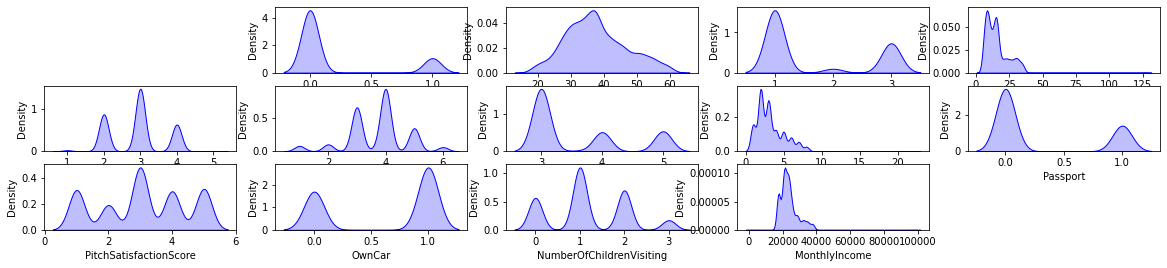

In [64]:
#UA of Num Values
plt.figure(figsize=(20, 20))
for i in range(1, len(num_col)):
    plt.subplot(14, 5, i+1)
    sns.kdeplot(x=data[num_col[i]],shade=True, color='b')
    plt.xlabel(num_col[i])

In [65]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


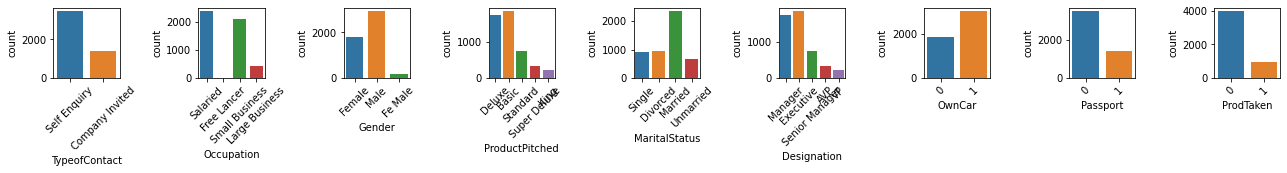

In [68]:
#UA of Cat Values
plt.figure(figsize=(20, 20))
cat = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation','OwnCar','Passport','ProdTaken']
for i in range(0, len(cat)):
    plt.subplot(9, 10, i+1)
    sns.countplot(x=data[cat[i]])
    plt.xlabel(cat[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [69]:
data.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

In [70]:
data['Age'] = data['Age'].replace(np.nan,data['Age'].mean())
data['DurationOfPitch'] = data['DurationOfPitch'].replace(np.nan,data['DurationOfPitch'].mean())
data['NumberOfTrips'] = data['NumberOfTrips'].replace(np.nan, data['NumberOfTrips'].mean())
data['NumberOfFollowups'] = data['NumberOfFollowups'].replace(np.nan, data['NumberOfFollowups'].mean())
data['PreferredPropertyStar'] = data['PreferredPropertyStar'].replace(np.nan, data['PreferredPropertyStar'].mean())
data['NumberOfChildrenVisiting'] = data['NumberOfChildrenVisiting'].replace(np.nan,data['NumberOfChildrenVisiting'].mean())
data['MonthlyIncome'] = data['MonthlyIncome'].replace(np.nan, data['MonthlyIncome'].mean())

In [71]:
data.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

In [50]:
data[(list(data.columns)[1:])].corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.143717,0.086852,0.076297,0.009627,0.111675,0.099265,0.018739,0.260844,0.051394,-0.011508,0.007388,-0.128092
Age,-0.143717,1.000000,-0.015344,-0.011280,0.011298,-0.002477,-0.010130,0.175526,0.032602,0.018055,0.047525,0.006617,0.456273
CityTier,0.086852,-0.015344,1.000000,0.022020,-0.001671,0.023524,-0.009145,-0.029352,0.001793,-0.042160,0.003817,0.000668,0.050644
DurationOfPitch,0.076297,-0.011280,0.022020,1.000000,0.063310,0.009197,-0.006448,0.009470,0.032245,-0.002810,-0.001585,0.030349,-0.006004
NumberOfPersonVisiting,0.009627,0.011298,-0.001671,0.063310,1.000000,0.326649,0.033749,0.192513,0.011177,-0.019581,0.010362,0.607215,0.189278
NumberOfFollowups,0.111675,-0.002477,0.023524,0.009197,0.326649,1.000000,-0.023957,0.137420,0.004951,0.004035,0.012057,0.283545,0.172591
PreferredPropertyStar,0.099265,-0.010130,-0.009145,-0.006448,0.033749,-0.023957,1.000000,0.011880,0.001038,-0.022635,0.015712,0.035378,0.013432
NumberOfTrips,0.018739,0.175526,-0.029352,0.009470,0.192513,0.137420,0.011880,1.000000,0.012769,-0.004307,-0.011666,0.164996,0.120758
Passport,0.260844,0.032602,0.001793,0.032245,0.011177,0.004951,0.001038,0.012769,1.000000,0.002926,-0.022330,0.020132,0.002488
PitchSatisfactionScore,0.051394,0.018055,-0.042160,-0.002810,-0.019581,0.004035,-0.022635,-0.004307,0.002926,1.000000,0.068850,0.000872,0.029701


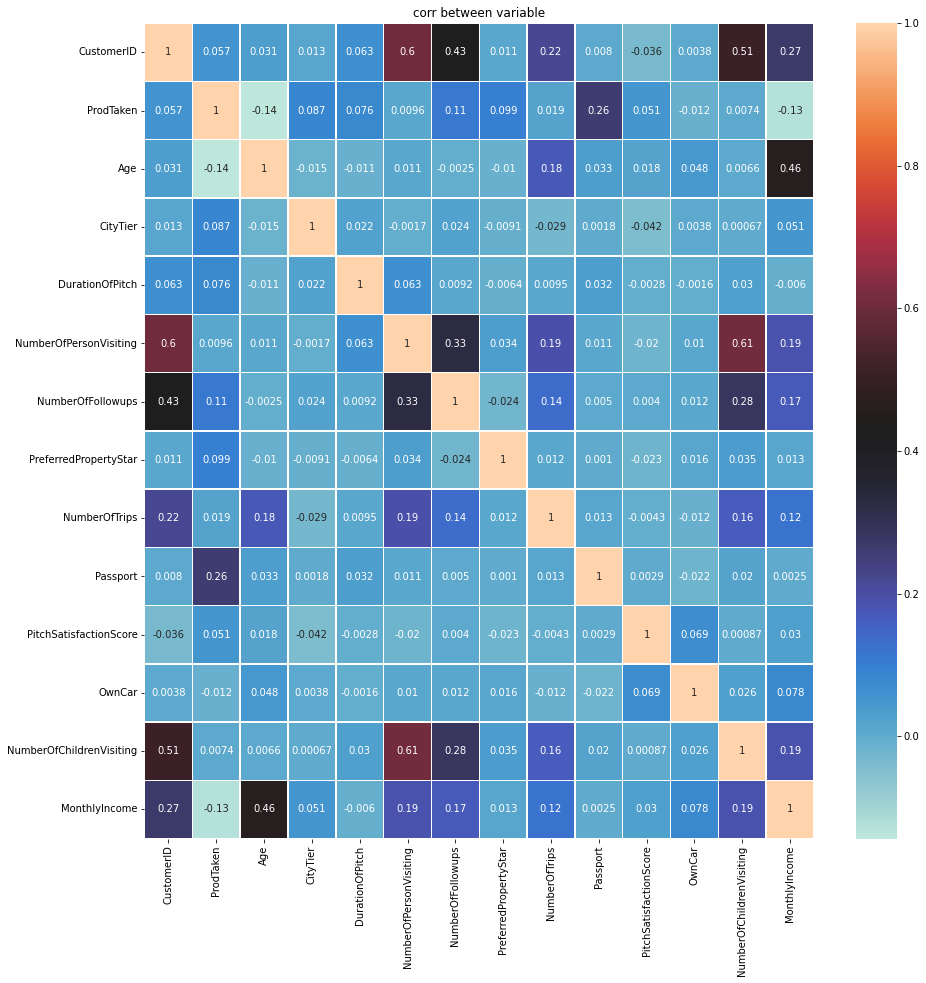

In [79]:
#corr between variable
sns.heatmap(data.corr(),annot=True,cmap='icefire',linewidths=0.5)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

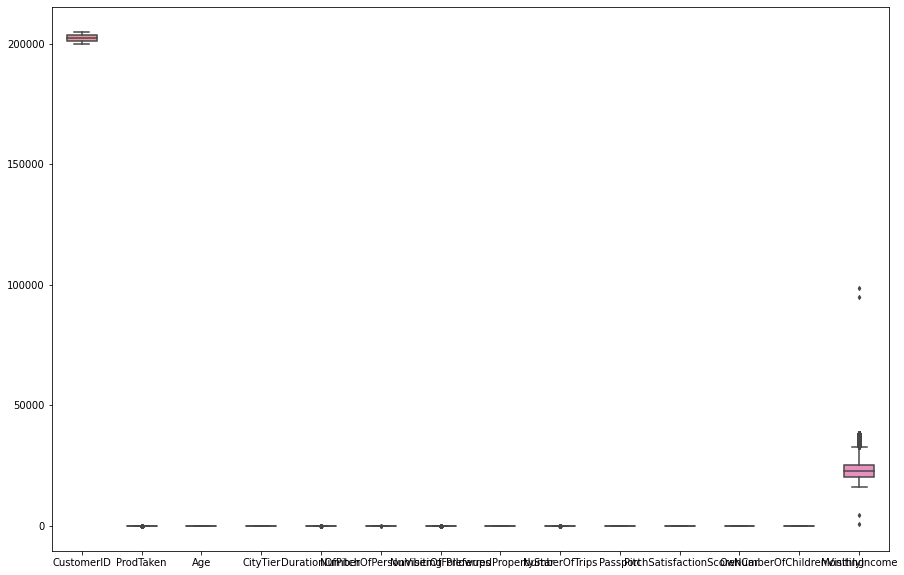

In [80]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [90]:
data_n = data.drop(['CustomerID'], axis=1)

In [91]:
data_n

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,3.469439
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,3.451282
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,3.381370
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,3.401214
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,3.414306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,3.573232
4884,1,28.000000,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,3.473943
4885,1,52.000000,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,3.654580
4886,1,19.000000,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,3.454678


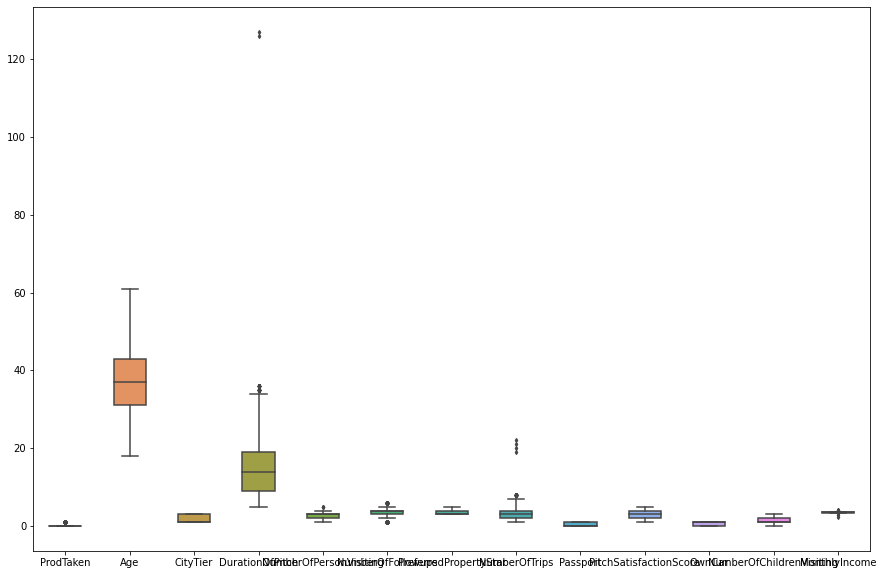

In [92]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_n, width= 0.5,ax=ax,  fliersize=3)

In [93]:
from sklearn.preprocessing import LabelEncoder
le_classes = LabelEncoder()
data_n['TypeofContact'] = le_classes.fit_transform(data_n['TypeofContact'])
data_n['Occupation'] = le_classes.fit_transform(data_n['Occupation'])
data_n['Gender'] = le_classes.fit_transform(data_n['Gender'])
data_n['ProductPitched'] = le_classes.fit_transform(data_n['ProductPitched'])
data_n['MaritalStatus'] = le_classes.fit_transform(data_n['MaritalStatus'])
data_n['Designation'] = le_classes.fit_transform(data_n['Designation'])

In [94]:
data_n

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,1,3,6.0,2,1,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,3.469439
1,0,49.000000,0,1,14.0,2,2,3,4.0,1,4.0,0,2.0,0,3,1,2.0,2,3.451282
2,1,37.000000,1,1,8.0,0,2,3,4.0,0,3.0,2,7.0,1,3,0,0.0,1,3.381370
3,0,33.000000,0,1,9.0,2,1,2,3.0,0,3.0,0,2.0,1,5,1,1.0,1,3.401214
4,0,37.622265,1,1,8.0,3,2,2,3.0,0,4.0,0,1.0,0,5,1,0.0,1,3.414306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,1,3,9.0,3,2,3,5.0,1,4.0,3,2.0,1,1,1,1.0,2,3.573232
4884,1,28.000000,0,1,31.0,2,2,4,5.0,0,3.0,2,3.0,1,3,1,2.0,1,3.473943
4885,1,52.000000,1,3,17.0,2,1,4,4.0,3,4.0,1,7.0,0,1,1,3.0,3,3.654580
4886,1,19.000000,1,3,16.0,3,2,3,4.0,0,3.0,2,3.0,0,5,0,2.0,1,3.454678


In [107]:
X = data_n.drop(columns = ['TypeofContact'])
y = data_n['TypeofContact']

In [108]:
X

,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,3,6.0,2,1,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,3.469439
1,0,49.000000,1,14.0,2,2,3,4.0,1,4.0,0,2.0,0,3,1,2.0,2,3.451282
2,1,37.000000,1,8.0,0,2,3,4.0,0,3.0,2,7.0,1,3,0,0.0,1,3.381370
3,0,33.000000,1,9.0,2,1,2,3.0,0,3.0,0,2.0,1,5,1,1.0,1,3.401214
4,0,37.622265,1,8.0,3,2,2,3.0,0,4.0,0,1.0,0,5,1,0.0,1,3.414306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,3,9.0,3,2,3,5.0,1,4.0,3,2.0,1,1,1,1.0,2,3.573232
4884,1,28.000000,1,31.0,2,2,4,5.0,0,3.0,2,3.0,1,3,1,2.0,1,3.473943
4885,1,52.000000,3,17.0,2,1,4,4.0,3,4.0,1,7.0,0,1,1,3.0,3,3.654580
4886,1,19.000000,3,16.0,3,2,3,4.0,0,3.0,2,3.0,0,5,0,2.0,1,3.454678


In [109]:
y

0       1
1       0
2       1
3       0
4       1
       ..
4883    1
4884    0
4885    1
4886    1
4887    1
Name: TypeofContact, Length: 4888, dtype: int64

In [110]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [111]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [112]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

vif

,vif,Features
0,1.203044,ProdTaken
1,1.381130,Age
2,1.075459,CityTier
3,1.018243,DurationOfPitch
4,1.031868,Occupation
5,1.033569,Gender
6,1.723033,NumberOfPersonVisiting
7,1.200816,NumberOfFollowups
8,2.369405,ProductPitched
9,1.020322,PreferredPropertyStar


In [113]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 0)

In [114]:
from sklearn.ensemble import RandomForestClassifier
rand_reg = RandomForestClassifier()

rand_reg.fit(x_train,y_train)

RandomForestClassifier()

In [115]:
y_pred = rand_reg.predict(x_test)

In [116]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8420621931260229